<a href="https://colab.research.google.com/github/Taejin1221/MachineLearning/blob/master/GAN_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [1]:
import glob, time, cv2, os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CURR_DIR = '/content/'

X_DATA_DIR =  CURR_DIR + 'train_x_data'
Y_DATA_DIR = CURR_DIR + 'train_y_data'
TEST_DIR = CURR_DIR + 'test_data'

In [3]:
IMG_SIZE = 256

# Make Data

In [4]:
x_data = np.linspace( -10, 10, 50 )

y_data1 = x_data
y_data2 = x_data ** 2
y_data3 = x_data ** 3 

Y_data = [ y_data1, y_data2, y_data3 ]

In [ ]:
file_list = os.listdir( '/' )

if ( X_DATA_DIR not in file_list ):
    os.mkdir( X_DATA_DIR )

if ( Y_DATA_DIR not in file_list ):
    os.mkdir( Y_DATA_DIR )

if ( TEST_DIR not in file_list ):
    os.mkdir( TEST_DIR )

In [6]:
n = len( Y_data ) * 10

figSize = ( IMG_SIZE / 100, IMG_SIZE / 100 )

os.chdir( X_DATA_DIR )
for i in range( n ):
    plt.figure( figsize = figSize, dpi = 100 )

    plt.plot( x_data, Y_data[i // 10], 'k.' )
    plt.axis( [ -10, 10, -50, 50 ] )
    plt.axis( 'off' )

    fileName = '0' + str( i ) if i < 10 else i
    plt.savefig( f'graph_x_{ fileName }.png'  )
    plt.clf()

os.chdir( Y_DATA_DIR )
for i in range( n ):
    plt.figure( figsize = figSize, dpi = 100 )

    plt.plot( x_data, Y_data[i // 10], 'k-' )
    plt.axis( [ -10, 10, -50, 50 ] )
    plt.axis( 'off' )

    fileName = '0' + str( i ) if i < 10 else i
    plt.savefig( f'graph_y_{ fileName }.png'  )
    plt.clf()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

In [7]:
dataSize = len( x_data )
os.chdir( TEST_DIR )

plt.figure( figsize = figSize, dpi = 100 )

plt.plot( [ -2, 0, 2 ], [ -2, 0, 2 ], 'k.' )
plt.axis( [ -10, 10, -50, 50 ] )
plt.axis( 'off' )

plt.savefig( f'graph_test_0.png'  )
plt.clf()


plt.figure( figsize = figSize, dpi = 100 )

plt.plot( [ -2, 0, 2 ], [ 4, 0, 4 ], 'k.' )
plt.axis( 'off' )

plt.savefig( f'graph_test_1.png'  )
plt.clf()


plt.figure( figsize = figSize, dpi = 100 )

plt.plot( [ -2, 0, 2 ], [ -8, 0, 8 ], 'k.' )
plt.axis( 'off' )

plt.savefig( f'graph_test_2.png'  )
plt.clf()


<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

<Figure size 256x256 with 0 Axes>

# Load Data

In [8]:
x_data, y_data = [ ], [ ]
x_test = [ ]

os.chdir( X_DATA_DIR )
files = glob.glob( '*png' )
for file in files:
    x_data.append( 255 - cv2.imread( file, 0 ) )

os.chdir( Y_DATA_DIR )
files = glob.glob( '*png' )
for file in files:
    y_data.append( 255 - cv2.imread( file, 0 ) )

os.chdir( TEST_DIR )
files = glob.glob( '*png' )
for file in files:
    x_test.append( 255 - cv2.imread( file, 0 ) )

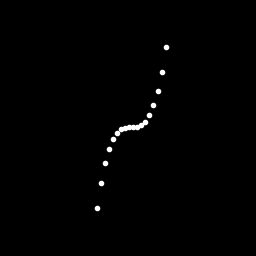

In [9]:
from google.colab.patches import cv2_imshow

cv2_imshow( x_data[0] )

In [10]:
x_data = np.array( x_data )
y_data = np.array( y_data )
x_test = np.array( x_test )

x_data = x_data.astype( 'float32' ) / 255.
y_data = y_data.astype( 'float32' ) / 255.
x_test = x_test.astype( 'float32' ) / 255.

x_data = np.reshape( x_data, ( len( x_data ), IMG_SIZE, IMG_SIZE, 1 ) )
y_data = np.reshape( y_data, ( len( y_data ), IMG_SIZE, IMG_SIZE, 1 ) )
x_test = np.reshape( x_test, ( len( x_test ), IMG_SIZE, IMG_SIZE, 1 ) )

In [11]:
x_data.shape

(30, 256, 256, 1)

# Build Models

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
BUFFER_SIZE = 30
BATCH_SIZE = 10
train_dataset = tf.data.Dataset.from_tensor_slices(x_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Build Generator Model

In [23]:
generator = keras.Sequential( name = 'generator' )

generator.add( layers.Input( [ IMG_SIZE, IMG_SIZE, 1 ] ) )

# output shape ( 128, 128, 32 )
generator.add( layers.Conv2DTranspose( 32, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.MaxPool2D( ( 2, 2 ) ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

# output shape ( 64, 64, 64 )
generator.add( layers.Conv2DTranspose( 64, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.MaxPool2D( ( 2, 2 ) ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

 # output shape ( 128, 128, 64 )
generator.add( layers.Conv2DTranspose( 64, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.UpSampling2D( ( 2, 2 ) ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

# output shape ( 256, 256, 32 )
generator.add( layers.Conv2DTranspose( 32, ( 5, 5 ), padding = 'same', use_bias = False ) )
generator.add( layers.UpSampling2D( ( 2, 2 ) ) )
generator.add( layers.BatchNormalization( ) )
generator.add( layers.LeakyReLU( ) )

# output shape ( 256, 256, 1 )
generator.add( layers.Conv2DTranspose( 1, ( 5, 5 ), padding = 'same', use_bias = False, activation = 'tanh' ) )

In [24]:
generator.compile( )
generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_10 (Conv2DT (None, 256, 256, 32)      800       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 128, 128, 64)      51200     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 64, 64, 64)        25

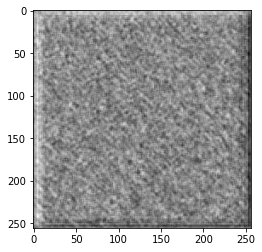

In [25]:
noise = tf.random.normal( [ 1, IMG_SIZE, IMG_SIZE, 1 ] )
generated_image = generator( noise, training = False )

plt.imshow( generated_image[ 0, :, :, 0 ], cmap = 'gray' )

In [19]:
generated_image.shape

TensorShape([1, 4096, 4096, 1])

## Build Discriminator Model

In [17]:
discriminator = keras.Sequential( name = 'discriminator' )

discriminator.add( layers.Conv2D( 32, ( 5, 5 ), strides = ( 2, 2 ), padding = 'same',
                                 input_shape = [ IMG_SIZE, IMG_SIZE, 1 ] ) )
discriminator.add( layers.LeakyReLU( ) )
discriminator.add( layers.Dropout( 0.3 ) )

discriminator.add( layers.Conv2D( 64, ( 5, 5 ), strides = ( 2, 2 ), padding = 'same' ) )
discriminator.add( layers.LeakyReLU( ) )
discriminator.add( layers.Dropout( 0.3 ) )

discriminator.add( layers.Conv2D( 128, ( 5, 5 ), strides = ( 2, 2 ), padding = 'same' ) )
discriminator.add( layers.LeakyReLU( ) )
discriminator.add( layers.Dropout( 0.3 ) )

discriminator.add( layers.Flatten( ) )
discriminator.add( layers.Dense( 1 ) )

In [26]:
decision = discriminator( generated_image )
print( decision )

tf.Tensor([[-0.00759057]], shape=(1, 1), dtype=float32)


# Train the models

## Define loss and optimizers

In [27]:
cross_entropy = keras.losses.BinaryCrossentropy( from_logits = True )

In [28]:
def discriminator_loss( real_output, fake_output ):
    real_loss = cross_entropy( tf.ones_like( real_output ), real_output )
    fake_loss = cross_entropy( tf.zeros_like( fake_output ), fake_output )

    total_loss = real_loss + fake_loss
    
    return total_loss

def generator_loss( fake_output ):
    return cross_entropy( tf.ones_like( fake_output ), fake_output )

In [29]:
generator_optimizer = tf.keras.optimizers.Adam( 1e-4 )
discriminator_optimizer = tf.keras.optimizers.Adam( 1e-4 )

## Define Hyperparameter

In [30]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

## Define Train Function

In [33]:
@tf.function
def train_step( images ):
    noise = tf.random.normal( [ BATCH_SIZE, IMG_SIZE, IMG_SIZE, 1 ] )

    with tf.GradientTape( ) as gen_tape, tf.GradientTape( ) as disc_tape:
      generated_images = generator( noise, training = True )

      real_output = discriminator( images, training = True )
      fake_output = discriminator( generated_images, training = True )

      gen_loss = generator_loss( fake_output )
      disc_loss = discriminator_loss( real_output, fake_output )

    gradients_of_generator = gen_tape.gradient( gen_loss, generator.trainable_variables )
    gradients_of_discriminator = disc_tape.gradient( disc_loss, discriminator.trainable_variables )

    generator_optimizer.apply_gradients( zip( gradients_of_generator, generator.trainable_variables ) )
    discriminator_optimizer.apply_gradients( zip( gradients_of_discriminator, discriminator.trainable_variables ) )

def train( dataset, epochs ):
  for epoch in range( epochs ):
    start = time.time( )

    for image_batch in dataset:
      train_step( image_batch )

    print( 'Time for epoch {} is {} sec'.format( epoch + 1, time.time( ) - start ) )

In [34]:
train( train_dataset, EPOCHS )

Time for epoch 1 is 2.1687653064727783 sec
Time for epoch 2 is 0.2667820453643799 sec
Time for epoch 3 is 0.2677738666534424 sec
Time for epoch 4 is 0.2698087692260742 sec
Time for epoch 5 is 0.2676105499267578 sec
Time for epoch 6 is 0.26726794242858887 sec
Time for epoch 7 is 0.26773667335510254 sec
Time for epoch 8 is 0.2705085277557373 sec
Time for epoch 9 is 0.26822614669799805 sec
Time for epoch 10 is 0.26720523834228516 sec
Time for epoch 11 is 0.2675642967224121 sec
Time for epoch 12 is 0.2700023651123047 sec
Time for epoch 13 is 0.2682192325592041 sec
Time for epoch 14 is 0.2680501937866211 sec
Time for epoch 15 is 0.2699015140533447 sec
Time for epoch 16 is 0.26881933212280273 sec
Time for epoch 17 is 0.2691457271575928 sec
Time for epoch 18 is 0.2700536251068115 sec
Time for epoch 19 is 0.2695963382720947 sec
Time for epoch 20 is 0.2687108516693115 sec
Time for epoch 21 is 0.2748839855194092 sec
Time for epoch 22 is 0.2636129856109619 sec
Time for epoch 23 is 0.2692224979400

# Test Model

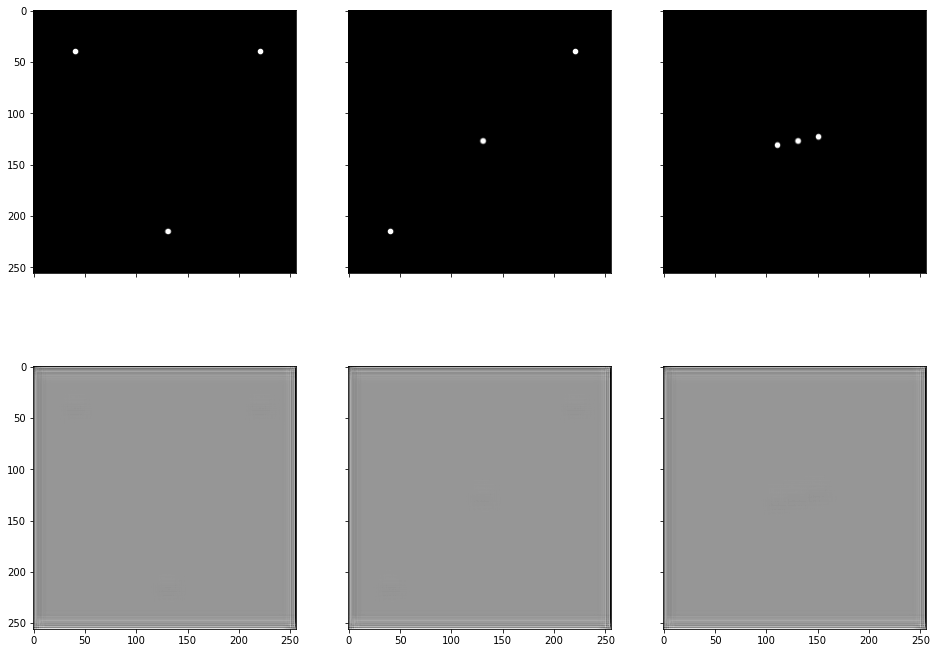

In [55]:
predicted_images = generator( x_test )

n = 3
fig, ax = plt.subplots( 2, 3, True, True, figsize = ( 16, 12 ) )
for i in range( n ):
    ax[0][i].imshow( x_test[i].reshape( 256, 256 ) )

    ax[1][i].imshow( tf.reshape( predicted_images[i], ( 256, 256 ) ) )
plt.savefig( 'result.png' )